In [4]:
import pandas as pd
import re
import numpy as np
from collections import Counter

In [5]:
pip install pyspark

In [3]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [6]:
import os

os.environ['KAGGLE_USERNAME'] = "daryasavitskaya"
os.environ['KAGGLE_KEY'] = "9358356"

!pip install kaggle
!kaggle datasets download -d asaniczka/1-3m-linkedin-jobs-and-skills-2024
!unzip 1-3m-linkedin-jobs-and-skills-2024.zip -d ./data/

Dataset URL: https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024
License(s): ODC Attribution License (ODC-By)
100% 1.87G/1.88G [00:12<00:00, 136MB/s]
100% 1.88G/1.88G [00:12<00:00, 162MB/s]
Archive:  1-3m-linkedin-jobs-and-skills-2024.zip
  inflating: ./data/job_skills.csv   
  inflating: ./data/job_summary.csv  
  inflating: ./data/linkedin_job_postings.csv  


#### Data Exporation

In [ ]:
job_skill = pd.read_csv('./data/job_skills.csv')

In [ ]:
job_skill.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [ ]:
job_skill.info() #we see some nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   job_link    1296381 non-null  object
 1   job_skills  1294346 non-null  object
dtypes: object(2)
memory usage: 19.8+ MB


In [ ]:
job_skill.iloc[6]['job_skills']

'Consultation, Supervision, InService Training, PreService Training, Youth Intake, Individual Treatment Plans, Program Development, Data Collection, Quality Control Programs, Performance Evaluations, Staff Recruitment and Selection, Emergency Consultation, Quality Improvement, Joint Commission Standards, TFM Certification, SelfMotivation, High Stress Tolerance, Fast Paced Work Environment, Minimal Supervision, Auditory Ability, Visual Ability, Olfactory Ability, Physical Stamina, Computer Literacy, Communication Skills, Reading and Writing Skills, Clinical Duties, COVID19 Vaccination, Flu Shot'

In [ ]:
job_skill = job_skill.dropna(subset=['job_skills'])

all_skills = []
for skills in job_skill['job_skills']:
    all_skills.extend(skills.split(','))

all_skills = [skill.strip() for skill in all_skills]

Total skills: 26925304
Sample skills: ['Building Custodial Services', 'Cleaning', 'Janitorial Services', 'Materials Handling', 'Housekeeping', 'Sanitation', 'Waste Management', 'Floor Maintenance', 'Equipment Maintenance', 'Safety Protocols']


In [ ]:
skill_counts = Counter(all_skills)
skill_counts.most_common(30)

[('Communication', 368293),
 ('Teamwork', 226266),
 ('Leadership', 184341),
 ('Customer service', 166209),
 ('Communication skills', 116260),
 ('Customer Service', 110418),
 ('Problem Solving', 102046),
 ('Sales', 92766),
 ('Problemsolving', 92512),
 ('Nursing', 87484),
 ('Collaboration', 86804),
 ('Training', 83195),
 ('Project Management', 81106),
 ('Communication Skills', 78721),
 ('Attention to detail', 75476),
 ('Microsoft Office Suite', 73372),
 ('Time management', 72481),
 ('Time Management', 69769),
 ('Scheduling', 64090),
 ('Microsoft Office', 60277),
 ('Multitasking', 59234),
 ('Adaptability', 58707),
 ('Patient Care', 58373),
 ('Attention to Detail', 57676),
 ('Flexibility', 56556),
 ('Interpersonal skills', 55553),
 ('Documentation', 51511),
 ('Data Analysis', 47366),
 ('Organization', 46853),
 ('Problem solving', 46221)]

In [ ]:
job_skill['job_skills'] = job_skill['job_skills'].str.lower()

In [ ]:
job_skill = job_skill.dropna(subset=['job_skills'])

all_skills = []
for skills in job_skill['job_skills']:
    all_skills.extend(skills.split(','))

all_skills = [skill.strip() for skill in all_skills]

len(all_skills)
all_skills[:10]


['building custodial services',
 'cleaning',
 'janitorial services',
 'materials handling',
 'housekeeping',
 'sanitation',
 'waste management',
 'floor maintenance',
 'equipment maintenance',
 'safety protocols']

In [ ]:
skill_counts = Counter(all_skills)
skill_counts.most_common(30)

[('communication', 370143),
 ('customer service', 278102),
 ('teamwork', 227609),
 ('communication skills', 195949),
 ('leadership', 185187),
 ('problem solving', 149032),
 ('time management', 142911),
 ('attention to detail', 133975),
 ('problemsolving', 129329),
 ('project management', 121563),
 ('interpersonal skills', 100267),
 ('patient care', 99926),
 ('sales', 93031),
 ('nursing', 88015),
 ('collaboration', 87116),
 ('training', 83656),
 ('data analysis', 81964),
 ('microsoft office suite', 75531),
 ('organizational skills', 75274),
 ('inventory management', 71911),
 ('high school diploma', 67267),
 ('scheduling', 64461),
 ("bachelor's degree", 63490),
 ('multitasking', 62044),
 ('analytical skills', 60768),
 ('microsoft office', 60604),
 ('adaptability', 59121),
 ('flexibility', 56896),
 ('critical thinking', 53081),
 ('documentation', 51875)]

In [ ]:
skills_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])

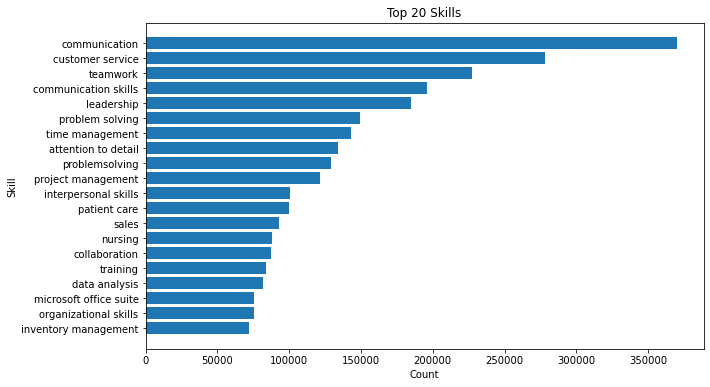

In [ ]:
top_skills = skills_df.sort_values('Frequency', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_skills['Skill'], top_skills['Frequency'])
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 20 Skills')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773203 entries, 0 to 2773202
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Skill      object
 1   Frequency  int64 
dtypes: int64(1), object(1)
memory usage: 42.3+ MB


In [ ]:
skills_df.describe()

,Frequency
count,2.773203e+06
mean,9.709100e+00
std,4.925670e+02
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,3.701430e+05


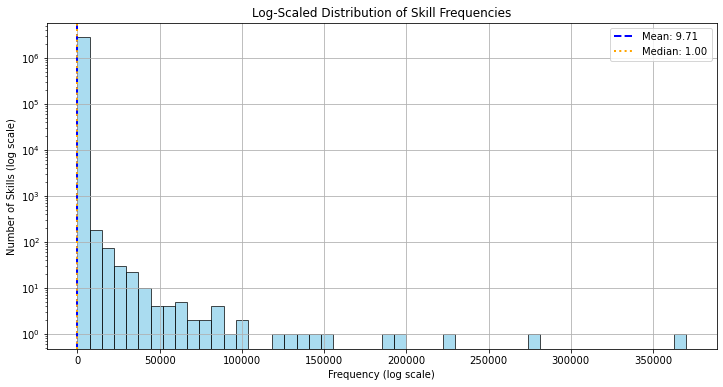

In [ ]:
mean_frequency = skills_df['Frequency'].mean()
median_frequency = skills_df['Frequency'].median()

plt.figure(figsize=(12, 6))
plt.hist(skills_df['Frequency'], bins=50, color='skyblue', edgecolor='black', alpha=0.7, log=True)

plt.axvline(mean_frequency, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_frequency:.2f}')
plt.axvline(median_frequency, color='orange', linestyle='dotted', linewidth=2, label=f'Median: {median_frequency:.2f}')

plt.title('Log-Scaled Distribution of Skill Frequencies')
plt.xlabel('Frequency (log scale)')
plt.ylabel('Number of Skills (log scale)')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
job_skill.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"building custodial services, cleaning, janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"customer service, restaurant management, food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"applied behavior analysis (aba), data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"electrical engineering, project controls, sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"electrical assembly, point to point wiring, st..."


In [ ]:
job_skill.to_csv('LOWER_job_skills.csv', index=False)